In [46]:
import pandas as np
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt

In [5]:
tick = yf.Ticker("MSFT")

In [6]:
hist = tick.history("max")

In [11]:
df = hist.Close

### Preprocessing

In [12]:
df = df.to_frame()


In [13]:
df = df.reset_index()

In [14]:
#df.head()

,Date,Close
0,1986-03-13,0.061378
1,1986-03-14,0.063570
2,1986-03-17,0.064667
3,1986-03-18,0.063022
4,1986-03-19,0.061926


In [15]:
import datetime as datetime
import pandas as pd
training_dates = pd.to_datetime(df["Date"])

In [16]:
df_for_training = df[["Close"]]

In [18]:
#df_for_training.head()

In [19]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit_transform(df_for_training)

array([[-0.6071037 ],
       [-0.60706605],
       [-0.60704722],
       ...,
       [ 4.56626296],
       [ 4.6468208 ],
       [ 4.56111022]])

In [23]:
# Creating dataset
train_X = []
train_Y = []
n_past = 14
n_future = 1

In [21]:
df_for_training = df_for_training.values

In [22]:
#df_for_training

array([[6.13783449e-02],
       [6.35702983e-02],
       [6.46669120e-02],
       ...,
       [3.01250000e+02],
       [3.05940002e+02],
       [3.00950012e+02]])

In [24]:
for i in range(len(df_for_training)-n_past-1):
		a = df_for_training[i:(i+n_past), 0]   ###i=0, 0,1,2,3-----99   100 
		train_X.append(a)
		train_Y.append(df_for_training[i + n_past, 0])

In [27]:
# converting to array
train_X = np.array(train_X)
train_Y = np.array(train_Y)

In [30]:
print(train_X.shape, train_Y.shape)


(9036, 14) (9036,)


In [31]:
train_X = train_X.reshape(train_X.shape[0], train_X.shape[1], n_future)
train_X.shape

(9036, 14, 1)

In [32]:
train_Y = train_Y.reshape(train_Y.shape[0], n_future)
train_Y.shape

(9036, 1)

In [36]:
# loading model from tensorflow import keras
from tensorflow import keras
model1 = keras.models.load_model("stock_prediction_lstm.h5")

In [33]:
n_future = 90
forecast_period_date = pd.date_range(list(training_dates)[-1], periods=n_future, freq="1d").tolist()

In [34]:
#forecast_period_date

[Timestamp('2022-02-07 00:00:00', freq='D'),
 Timestamp('2022-02-08 00:00:00', freq='D'),
 Timestamp('2022-02-09 00:00:00', freq='D'),
 Timestamp('2022-02-10 00:00:00', freq='D'),
 Timestamp('2022-02-11 00:00:00', freq='D'),
 Timestamp('2022-02-12 00:00:00', freq='D'),
 Timestamp('2022-02-13 00:00:00', freq='D'),
 Timestamp('2022-02-14 00:00:00', freq='D'),
 Timestamp('2022-02-15 00:00:00', freq='D'),
 Timestamp('2022-02-16 00:00:00', freq='D'),
 Timestamp('2022-02-17 00:00:00', freq='D'),
 Timestamp('2022-02-18 00:00:00', freq='D'),
 Timestamp('2022-02-19 00:00:00', freq='D'),
 Timestamp('2022-02-20 00:00:00', freq='D'),
 Timestamp('2022-02-21 00:00:00', freq='D'),
 Timestamp('2022-02-22 00:00:00', freq='D'),
 Timestamp('2022-02-23 00:00:00', freq='D'),
 Timestamp('2022-02-24 00:00:00', freq='D'),
 Timestamp('2022-02-25 00:00:00', freq='D'),
 Timestamp('2022-02-26 00:00:00', freq='D'),
 Timestamp('2022-02-27 00:00:00', freq='D'),
 Timestamp('2022-02-28 00:00:00', freq='D'),
 Timestamp

In [38]:
forecast = model1.predict(train_X[-n_future:])
forecast

array([[285.34784],
       [282.7851 ],
       [279.0868 ],
       [274.8396 ],
       [272.928  ],
       [276.407  ],
       [278.69943],
       [280.9437 ],
       [287.90414],
       [284.9684 ],
       [285.5265 ],
       [287.50696],
       [290.87692],
       [294.13113],
       [296.32837],
       [300.28366],
       [302.66205],
       [303.90976],
       [305.5488 ],
       [304.64175],
       [303.08112],
       [303.74548],
       [312.1557 ],
       [315.09503],
       [319.17035],
       [321.5318 ],
       [324.883  ],
       [325.8398 ],
       [327.22443],
       [329.76486],
       [331.97604],
       [331.5924 ],
       [328.67413],
       [323.2504 ],
       [322.77026],
       [323.59308],
       [324.55215],
       [326.83536],
       [333.64325],
       [333.25244],
       [331.26257],
       [328.13763],
       [325.5848 ],
       [323.88013],
       [322.81314],
       [322.54678],
       [321.8525 ],
       [319.30447],
       [318.85355],
       [315.52344],


In [39]:
forecast_copies = np.repeat(forecast, df_for_training.shape[1], axis = 1)
y_pred_future = forecast_copies

In [40]:
forecast_dates = []
for time_i in forecast_period_date:
   forecast_dates.append(time_i.date())

In [41]:
y_pred_future = y_pred_future.flatten()

In [42]:
df_future = pd.DataFrame({"Date":np.array(forecast_dates), "Close":y_pred_future})

In [43]:
df_future["Date"] = pd.to_datetime(df_future["Date"])

In [44]:
original = hist["Close"]
original = original.to_frame().reset_index()

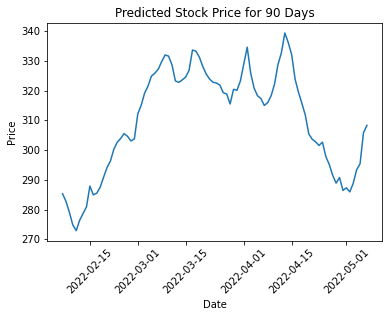

In [63]:
plt.title(f"Predicted Stock Price for {n_future} Days")
plt.plot(forecast_dates,  y_pred_future)
plt.xticks(rotation=45)
plt.xlabel("Date")
plt.ylabel("Price")
plt.show()

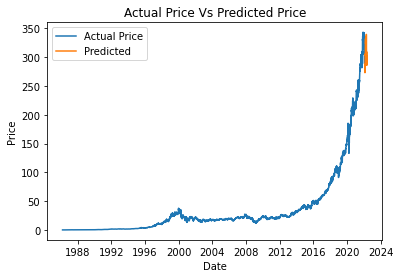

In [62]:
plt.title("Actual Price Vs Predicted Price")
plt.plot(original["Date"], original["Close"], label="Actual Price")
plt.plot(df_future["Date"], df_future["Close"], label="Predicted")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

In [50]:
df_future

,Date,Close
0,2022-02-07,285.347839
1,2022-02-08,282.785095
2,2022-02-09,279.086792
3,2022-02-10,274.839600
4,2022-02-11,272.928009
...,...,...
85,2022-05-03,288.843445
86,2022-05-04,293.382935
87,2022-05-05,295.437256
88,2022-05-06,305.841248


In [57]:
#dumping model
# import pickle
# filename = "trained_model.sav"
# pickle.dump(model1, open(filename, 'wb'))
#loaded_model = pickle.load(open("stock_prediction_lstm.h5", 'rb'))